# S I R Model used for disease outbreak

This project will look at the basic of S I R model and how it is used for disease outbreak. Whilst this model can be used for COVID 19, it is not clear if an individual is immune from the disease once they have caught it once. For this excercise we will assume that this is the case. 

In [80]:
#Import Packages

import scipy

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
#set variables
#Set population value
#Set to the population of london. This can easily change to UK or any other city
population = 9304000

#Initially we set the number of people infected to 1 and recovered to 0. Again this can be changed accordingly to see how 
#fast the infection increases
Initial_infected, Initial_recovered = 4842,416

#To work out susceptible
Initial_everyone_else = population - Initial_infected - Initial_recovered

Initial_conditions = Initial_everyone_else, Initial_infected, Initial_recovered

In [123]:
#The time space we want to use. We can shorten this or increase this
n_days = 500

time = np.linspace(0,n_days, n_days)

In [169]:
#explaination of contact rate
contact_rate = 0.25
#Rate of recovery. We are suggesting that an indivual is likely to stay infected for 14 days.
recovery_rate = 1/14

def SIR(Initial_conditions, t, population, contact_rate, recovery_rate):    
    S, I, R = Initial_conditions
    ds = -contact_rate * S * I/population
    dI = contact_rate * S * I/population - recovery_rate * I
    dR = recovery_rate * I
    return ds, dI, dR


In [170]:
result = odeint(SIR, Initial_conditions, time, args=(population, contact_rate, recovery_rate))

S, I, R = result.T

In [171]:
def rowIndex(row):
    return row.name

In [172]:
#Create daterange df from 24th March 2020 - Start of Lockdown UK
rng = pd.date_range('2020-03-24', periods=500, freq='D')

#convert range to dataframe
Data_Initial = pd.DataFrame({'Date_Range':rng})
Data_Initial['Days'] = Data_Initial.apply(rowIndex,axis=1)
Data_Initial['Susceptible'] = Data_Initial.apply(lambda x: S[x.Days],axis=1)
Data_Initial['Infection'] = Data_Initial.apply(lambda x: I[x.Days],axis=1)
Data_Initial['Recovered'] = Data_Initial.apply(lambda x: R[x.Days],axis=1)

In [173]:
#Inspect the table
Data_Initial.head(10)

,Date_Range,Days,Susceptible,Infection,Recovered
0,2020-03-24,0,9.298742e+06,4842.000000,416.000000
1,2020-03-25,1,9.297415e+06,5789.802884,795.459270
2,2020-03-26,2,9.295828e+06,6922.863675,1249.187357
3,2020-03-27,3,9.293931e+06,8277.276539,1791.697040
4,2020-03-28,4,9.291664e+06,9896.118083,2440.327061
5,2020-03-29,5,9.288953e+06,11830.776439,3215.788017
6,2020-03-30,6,9.285715e+06,14142.524474,4142.812014
7,2020-03-31,7,9.281845e+06,16904.377231,5250.924695
8,2020-04-01,8,9.277221e+06,20203.280201,6575.361993
9,2020-04-02,9,9.271699e+06,24142.677741,8158.156490


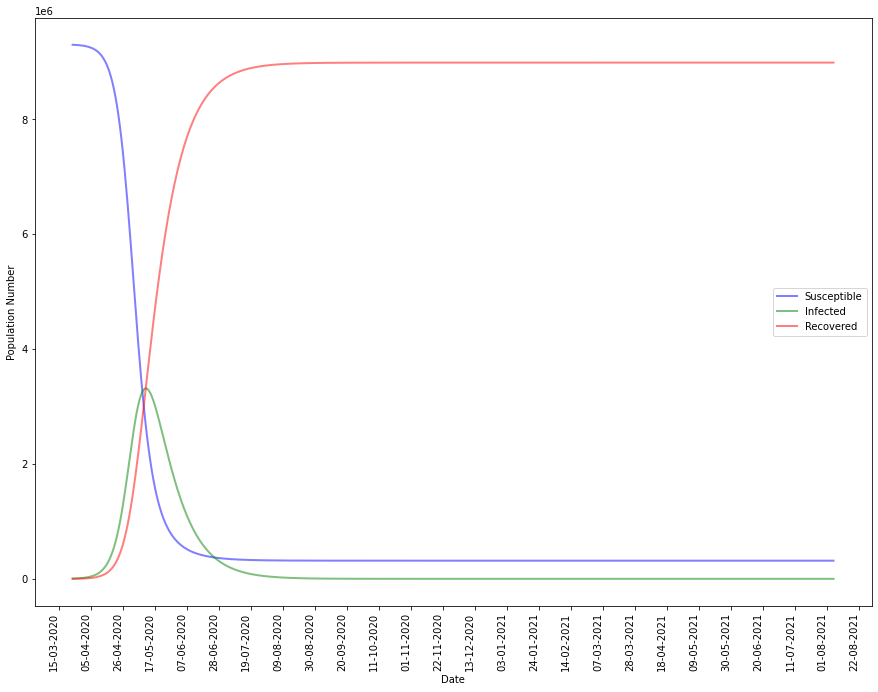

In [174]:
#Create a graph to view the rate of change for each group
from matplotlib import dates
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot("Date_Range", "Susceptible", data = Data_Initial, color='b', alpha=0.5, lw=2, label="Susceptible")
ax.plot("Date_Range", "Infection", data = Data_Initial, color='g', alpha=0.5, lw=2, label="Infected")
ax.plot("Date_Range", "Recovered", data = Data_Initial, color='r', alpha=0.5, lw=2, label="Recovered")
ax.set_xlabel("Date")
ax.set_ylabel("Population Number")

formatter = dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate(rotation=90)

ax.xaxis.set_major_locator(dates.DayLocator(interval=21))
legend = ax.legend()

We observe that the peak will appear around day 50 afterwhich we will slowly move away from the peak. The disease seems to flatten from day 120 onwards.

## What happens when you reduce the contact rate

In [175]:
#Set new contact rate - This rate could have been a direct impact of lockdown etc

contact_rate = 0.15

In [176]:
result_reduced_contact = odeint(SIR, Initial_conditions, time, args=(population, contact_rate, recovery_rate))

S_reduced, I_reduced, R_reduced = result_reduced_contact.T

In [177]:
Data_Initial['Susceptible_reduced'] = Data_Initial.apply(lambda x: S_reduced[x.Days],axis=1)
Data_Initial['Infection_reduced'] = Data_Initial.apply(lambda x: I_reduced[x.Days],axis=1)
Data_Initial['Recovered_reduced'] = Data_Initial.apply(lambda x: R_reduced[x.Days],axis=1)

#Difference between the reduction of infection
Data_Initial['Susceptible_%'] = (Data_Initial['Susceptible_reduced'] - Data_Initial['Susceptible']) / Data_Initial['Susceptible'] *100
Data_Initial['Infection_%'] = (Data_Initial['Infection_reduced'] - Data_Initial['Infection']) / Data_Initial['Infection'] *100
Data_Initial['Recovered_%'] = (Data_Initial['Recovered_reduced'] - Data_Initial['Recovered']) / Data_Initial['Recovered'] *100

In [178]:
Data_Initial.head(10)

,Date_Range,Days,Susceptible,Infection,Recovered,Susceptible_reduced,Infection_reduced,Recovered_reduced,Susceptible_%,Infection_%,Recovered_%
0,2020-03-24,0,9.298742e+06,4842.000000,416.000000,9.298742e+06,4842.000000,416.000000,0.000000,0.000000,0.000000
1,2020-03-25,1,9.297415e+06,5789.802884,795.459270,9.297985e+06,5238.136339,776.540919,0.006137,-9.528244,-2.378293
2,2020-03-26,2,9.295828e+06,6922.863675,1249.187357,9.297167e+06,5666.609532,1166.576120,0.014403,-18.146452,-6.613198
3,2020-03-27,3,9.293931e+06,8277.276539,1791.697040,9.296281e+06,6130.046996,1588.512832,0.025290,-25.941257,-11.340322
4,2020-03-28,4,9.291664e+06,9896.118083,2440.327061,9.295324e+06,6631.287515,2044.953779,0.039392,-32.991023,-16.201651
5,2020-03-29,5,9.288953e+06,11830.776439,3215.788017,9.294288e+06,7173.397916,2538.712921,0.057428,-39.366635,-21.054718
6,2020-03-30,6,9.285715e+06,14142.524474,4142.812014,9.293167e+06,7759.690975,3072.832419,0.080261,-45.132208,-25.827375
7,2020-03-31,7,9.281845e+06,16904.377231,5250.924695,9.291956e+06,8393.744651,3650.600910,0.108933,-50.345733,-30.476990
8,2020-04-01,8,9.277221e+06,20203.280201,6575.361993,9.290645e+06,9079.422719,4275.573195,0.144695,-55.059660,-34.975851
9,2020-04-02,9,9.271699e+06,24142.677741,8158.156490,9.289228e+06,9820.896959,4951.591504,0.189052,-59.321426,-39.305019


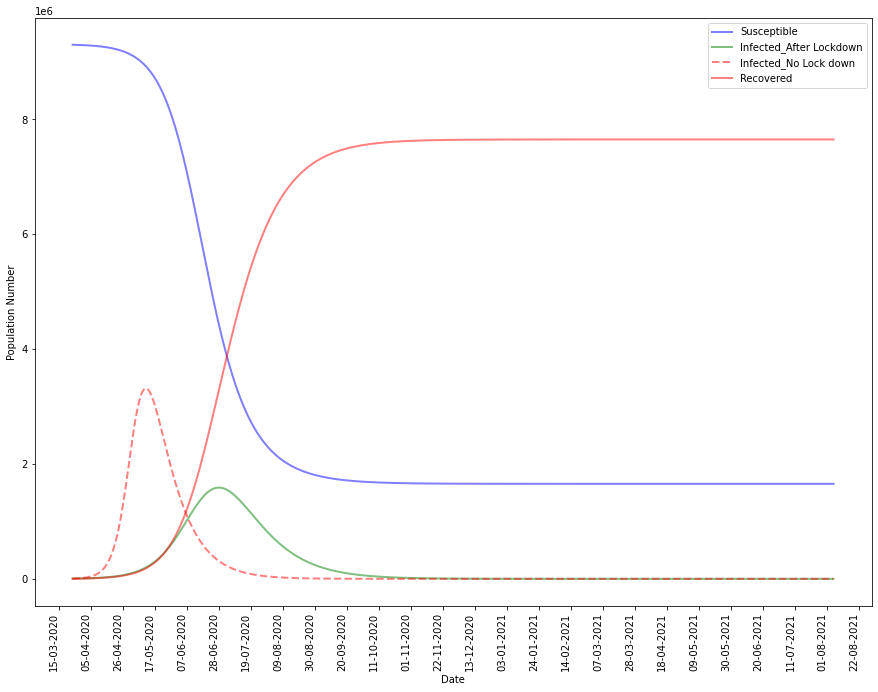

In [179]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot("Date_Range", "Susceptible_reduced", data = Data_Initial, color='b', alpha=0.5, lw=2, label="Susceptible")
ax.plot("Date_Range", "Infection_reduced", data = Data_Initial, color='g', alpha=0.5, lw=2, label="Infected_After Lockdown")
ax.plot("Date_Range", "Infection", data = Data_Initial, color='r', alpha=0.5, lw=2, label="Infected_No Lock down",linestyle='dashed')
ax.plot("Date_Range", "Recovered_reduced", data = Data_Initial, color='r', alpha=0.5, lw=2, label="Recovered")
ax.set_xlabel("Date")
ax.set_ylabel("Population Number")

formatter = dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate(rotation=90)

ax.xaxis.set_major_locator(dates.DayLocator(interval=21))
legend = ax.legend()

We observe by reducing the contact rate the curve starts to flatten slowly reducing the peak. This reduction in peak helps support other key services which are involved in taking care for people such as hospital and ambulances.

This can be used to do dynamic contact rate changes. Contact rate can be applied from a certain time/date period to observe the change in peak.